## Import libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import array
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from tensorflow.keras.models import Sequential

## Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data from CSV

In [3]:
colnames = ["target", "id", "date", "flag", "user", "text"]

In [4]:
df = pd.read_csv('/content/drive/MyDrive/training_1600000_processed_noemoticon.csv', encoding='ISO-8859-1', names=colnames, header=None)

df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## First 5 records

In [5]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Columns list

In [6]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

## Total records

In [7]:
print('length of data is', len(df))

length of data is 1600000


In [8]:
df. shape

(1600000, 6)

## Column datatype information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

## Looking for nulls

In [11]:
np.sum(df.isnull().any(axis=1))

0

## Column and Row count

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


## Target unique value

In [13]:
df['target'].unique()

array([0, 4])

In [14]:
df['target'].nunique()

2

## Visualization

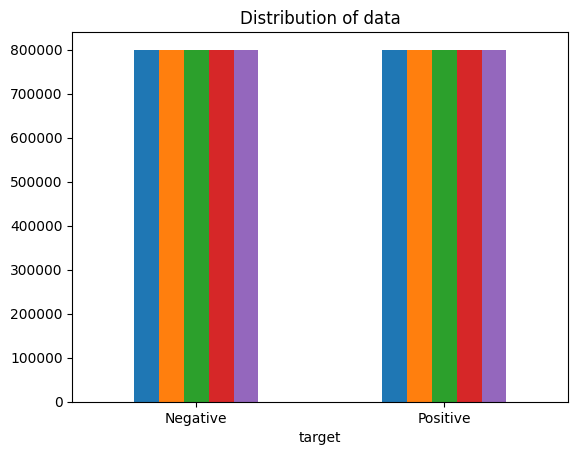

In [15]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

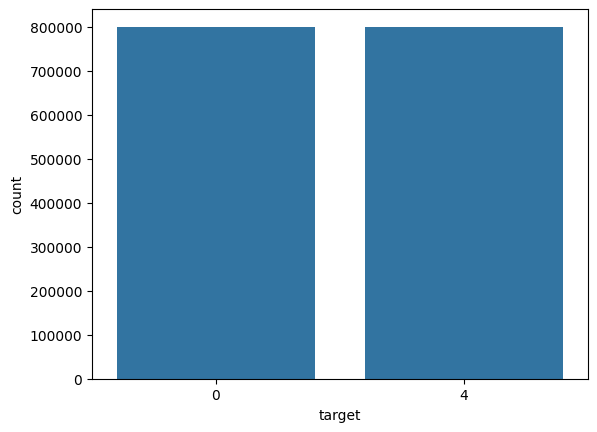

In [16]:
sns.countplot(x='target', data=df)

## Considering on needed columns

In [17]:
data=df[['text','target']]

## Replacing value in column

In [18]:
data['target'] = data['target'].replace(4,1)

<ipython-input-18-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [19]:
data['target'].unique()

array([0, 1])

## Filtering records in new dataframe

In [20]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

## Consider only first 50K recods of each for process

In [21]:
data_pos = data_pos.iloc[:int(50000)]
data_neg = data_neg.iloc[:int(50000)]

## Concatinate the both dataframe into one

In [22]:
data = pd.concat([data_pos, data_neg])

## Data pre-process

In [23]:
X = data["text"]
y = data["target"]

In [24]:
X.shape, y.shape

((100000,), (100000,))

In [25]:
X[5][:255]

'@Kwesidei not the whole crew '

In [26]:
X[5][:255]

'@Kwesidei not the whole crew '

## We will remove non alphabetic characters, best way to do that is regex method

In [27]:
# import re
# for i in range(X.shape[0]):
#     X[i] = re.sub('[^A-Za-z]', ' ', X[i])

X_series = pd.Series(X)

# Define the function to clean the text
def clean_text(text):
    return re.sub('[^A-Za-z]', ' ', text)

# Apply the function to the entire Series
X_cleaned = X_series.apply(clean_text)

# Convert the Series back to a numpy array if needed
X = X_cleaned.to_numpy()

## As you can see in stemming operation we extract root of the word. We will get rid of prefixes and suffixes. Before stemming operation we need to seperate sentences to words.

In [28]:
for i in range(X.shape[0]):
    X[i] = X[i].split(" ")
    X[i] = [w for w in X[i] if w != ""]

In [29]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [31]:
for i in range(X.shape[0]):
    X[i] = [stemmer.stem(w) for w in X[i]]

In [32]:
" ".join(X[5][:255])

'productoffear you can tell him that i just burst out laugh realli loud becaus of that thank for make me come out of my sulk'

## Remove Stop Words

In [33]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_ = stopwords.words("english")
",".join(stopwords_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

## By removing stop words we remove the low-level information from our text in order to give more focus to the important information. This words does not effect sentiment of the review

In [34]:
for i in range(X.shape[0]):
    X[i] = [w for w in X[i] if w not in stopwords_]

In [35]:
" ".join(X[5][:255])

'productoffear tell burst laugh realli loud becaus thank make come sulk'

## Create Bag of Words for every review

### Sort words by frequency

In [36]:
word_dict = {}
for i in range(X.shape[0]):
    for w in X[i]:
        if w not in word_dict:
            word_dict[w] = 0
        word_dict[w] += 1
word_dict = sorted(word_dict.items(), key= lambda x : x[1], reverse=True)

# print most used 20 words

cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 21:
        break
    print(k,v)

go 9099
get 6991
day 6946
wa 6453
work 6353
thi 6214
good 5996
like 5133
love 4930
today 4613
quot 4529
time 4237
back 4200
http 4175
got 3766
thank 3603
one 3573
want 3568
com 3532
lol 3270


## Print Word Cloud

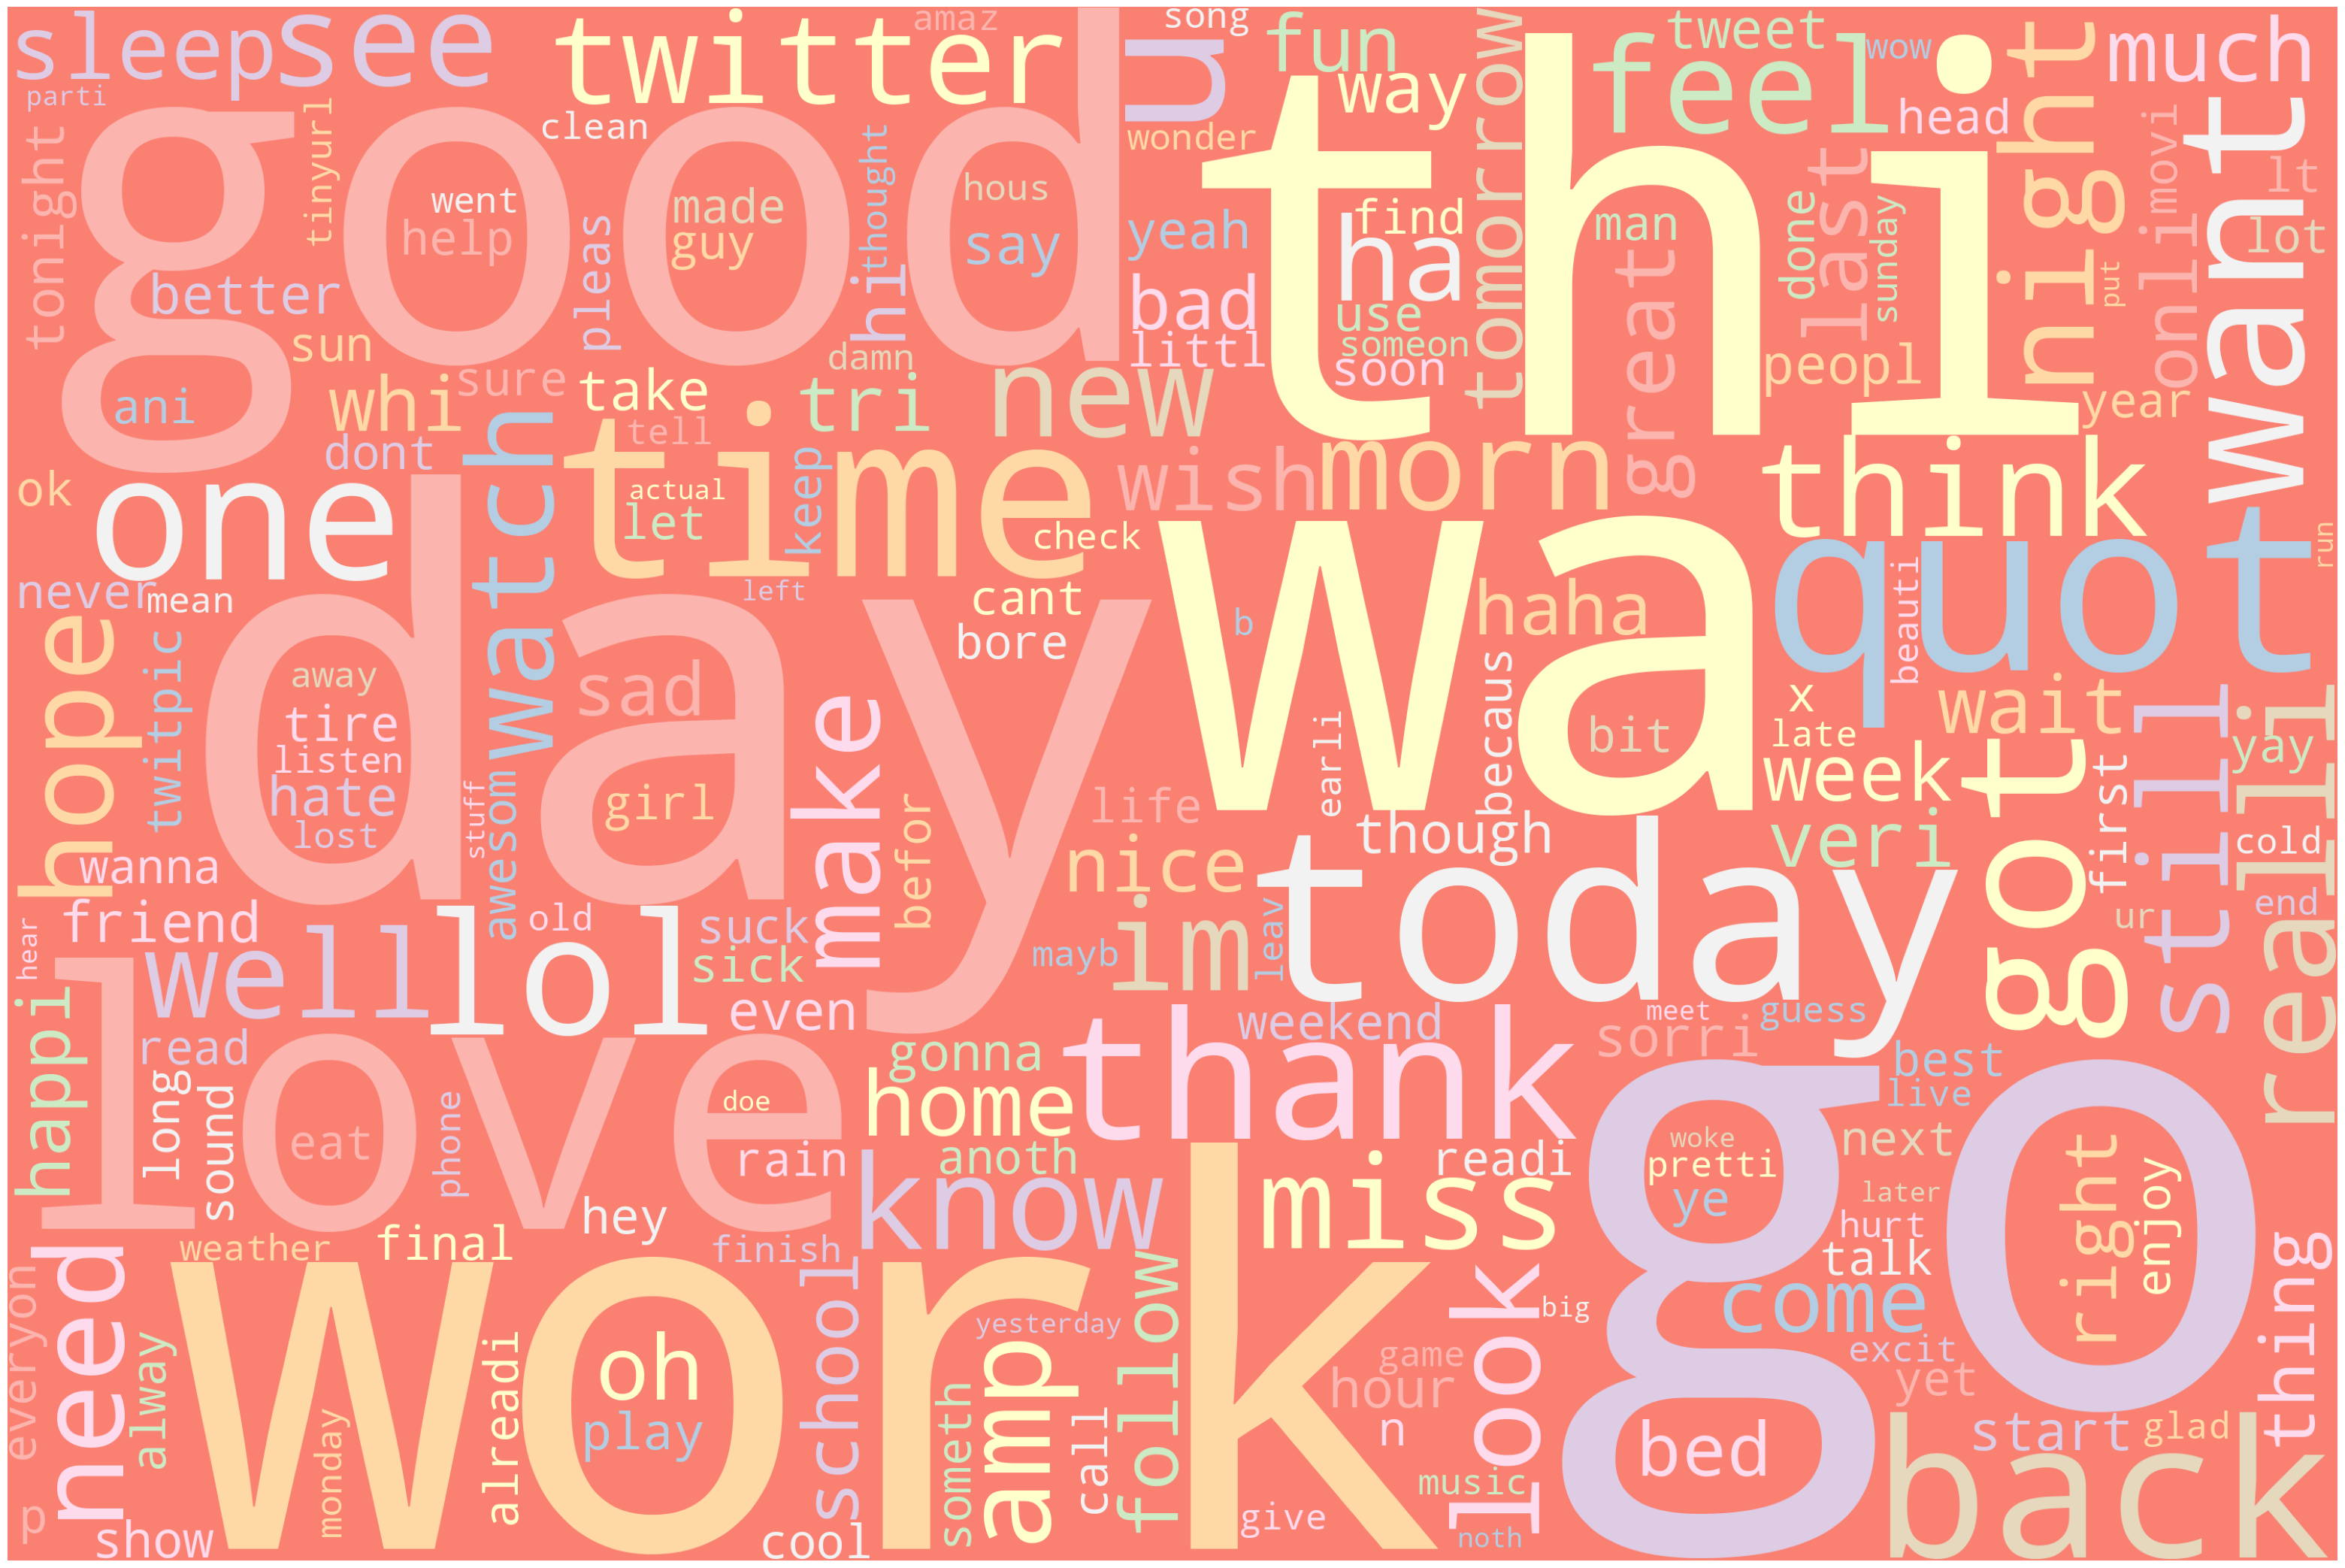

In [37]:
text = ""
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 5000:
        break
    for i in range(v):
        text += k + " "

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

## We will get 5000 most used words and store another dictionary

In [38]:
most_used_words = {}
cnt = 0
index = 0
for word, freq in word_dict:
    most_used_words[word] = index
    index += 1
    cnt += 1
    if cnt == 5000:
        break
list(most_used_words.items())[0:10]

[('go', 0),
 ('get', 1),
 ('day', 2),
 ('wa', 3),
 ('work', 4),
 ('thi', 5),
 ('good', 6),
 ('like', 7),
 ('love', 8),
 ('today', 9)]

## We will remove words not in most used word dict and we change every word with its index

In [39]:
X_train = []
for i in range(X.shape[0]):
    list_ = []
    for w in X[i]:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    X_train.append(list_)
for i in X_train[0]:
    print(i, end=" ")

8 1580 28 96 207 117 

## Train with RNN

In [40]:
leng = 0
for i in range(len(X_train)):
    leng += len(X_train[i])
leng / len(X_train)

6.75915

## Average length of sentences 7, we can use 10. We will constrain size of every sentence to 10. Algorithm will complete smaller sentences to 10 by adding zeros.

In [42]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train, 10)

In [43]:
print(X_train.shape)
for i in X_train[0]:
    print(i, end=" ")

(100000, 10)
0 0 0 0 8 1580 28 96 207 117 

### We will use embedding algorithm in our RNN deep learning model. Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed

In [44]:
y[0:5]

800000    1
800001    1
800002    1
800003    1
800004    1
Name: target, dtype: int64

## Model building

### Split the data into train and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train, np.array(y), test_size = 0.2)

## LSTM model

In [51]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.Embedding(5000, 32, input_length=10))
lstm_model.add(keras.layers.LSTM(100, return_sequences = True))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.LSTM(100, return_sequences = False))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.Dense(1, activation="sigmoid"))
lstm_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [52]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 32)            160000    
                                                                 
 lstm_2 (LSTM)               (None, 10, 100)           53200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 293701 (1.12 MB)
Trainable params: 29370

In [53]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00001
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)
mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose = 1)

In [54]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/30
2494/2500 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7204
Epoch 1: val_loss improved from inf to 0.50817, saving model to .mdl_wts.hdf5
2500/2500 [==============================] - 35s 11ms/step - loss: 0.5451 - accuracy: 0.7205 - val_loss: 0.5082 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 2/30
  20/2500 [..............................] - ETA: 13s - loss: 0.5043 - accuracy: 0.7312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2498/2500 [============================>.] - ETA: 0s - loss: 0.5000 - accuracy: 0.7601
Epoch 2: val_loss improved from 0.50817 to 0.50455, saving model to .mdl_wts.hdf5
2500/2500 [==============================] - 20s 8ms/step - loss: 0.4999 - accuracy: 0.7602 - val_loss: 0.5046 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 3/30
2491/2500 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.7682
Epoch 3: val_loss improved from 0.50455 to 0.50157, saving model to .mdl_wts.hdf5
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4872 - accuracy: 0.7683 - val_loss: 0.5016 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 4/30
2500/2500 [==============================] - ETA: 0s - loss: 0.4775 - accuracy: 0.7741
Epoch 4: val_loss did not improve from 0.50157
2500/2500 [==============================] - 18s 7ms/step - loss: 0.4775 - accuracy: 0.7741 - val_loss: 0.5039 - val_accuracy: 0.7575 - lr: 0.0010
Epoch 5/30
2499/2500 [============================>.] - ETA: 0s -

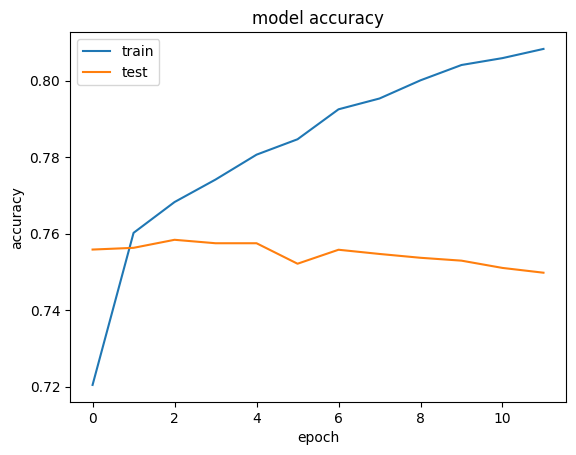

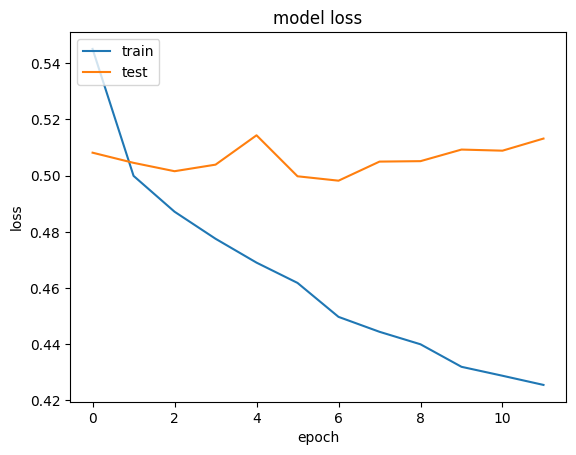

In [55]:
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test), callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

## GRU model

In [56]:
gru_model = keras.Sequential()
gru_model.add(keras.layers.Embedding(5000, 32, input_length=10))
gru_model.add(keras.layers.GRU(100, return_sequences = True, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.GRU(100, return_sequences = False, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.Dense(1, activation="sigmoid"))
gru_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [57]:
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 32)            160000    
                                                                 
 gru (GRU)                   (None, 10, 100)           40200     
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 260901 (1019.14 KB)
Trainable params: 26

Epoch 1/30
2494/2500 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7257
Epoch 1: val_loss did not improve from 0.49820
2500/2500 [==============================] - 27s 9ms/step - loss: 0.5407 - accuracy: 0.7258 - val_loss: 0.5081 - val_accuracy: 0.7535 - lr: 0.0010
Epoch 2/30
2495/2500 [============================>.] - ETA: 0s - loss: 0.4979 - accuracy: 0.7593
Epoch 2: val_loss did not improve from 0.49820
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4980 - accuracy: 0.7594 - val_loss: 0.5010 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 3/30
2499/2500 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.7706
Epoch 3: val_loss did not improve from 0.49820
2500/2500 [==============================] - 19s 7ms/step - loss: 0.4832 - accuracy: 0.7706 - val_loss: 0.4990 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 4/30
2499/2500 [============================>.] - ETA: 0s - loss: 0.4732 - accuracy: 0.7777
Epoch 4: val_loss improved

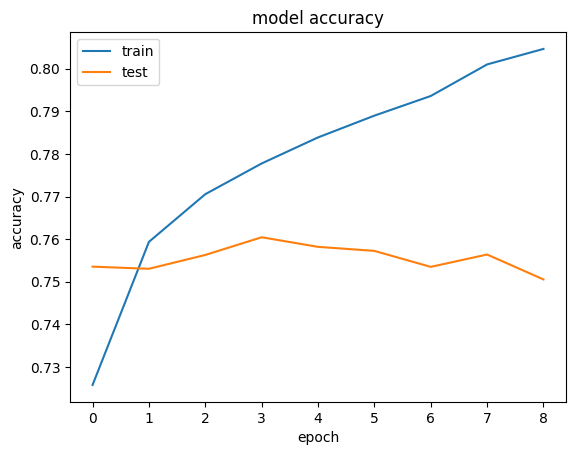

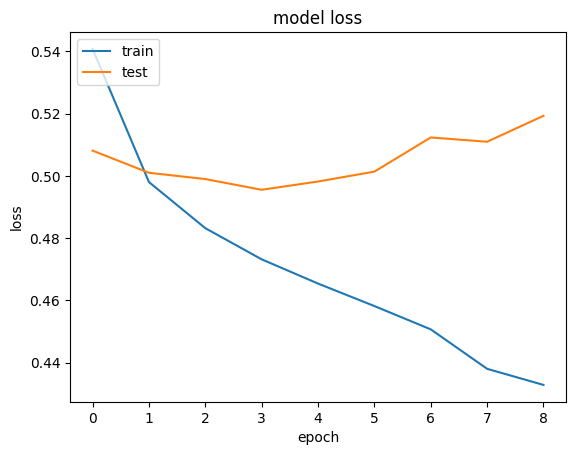

In [58]:
history = gru_model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

## Dense Model

In [90]:
# Define parameter
vocab_size = 5000
embedding_dim = 32
drop_value = 0.2
n_dense = 24
max_len = 10
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 32)            160000    
                                                                 
 global_average_pooling1d_4  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 128)               4224      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 164353 (642.00 KB)
Trainable params: 164353 (642.00 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [92]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    validation_data= (X_test, y_test),
                    callbacks =[learning_rate_reduction, early_stopping, mcp_save],
                    verbose=2)

Epoch 1/30

Epoch 1: val_loss did not improve from 0.49525
2500/2500 - 22s - loss: 0.5295 - accuracy: 0.7342 - val_loss: 0.5008 - val_accuracy: 0.7573 - lr: 0.0010 - 22s/epoch - 9ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 0.49525
2500/2500 - 10s - loss: 0.4787 - accuracy: 0.7687 - val_loss: 0.5033 - val_accuracy: 0.7574 - lr: 0.0010 - 10s/epoch - 4ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.49525
2500/2500 - 9s - loss: 0.4638 - accuracy: 0.7750 - val_loss: 0.5092 - val_accuracy: 0.7564 - lr: 0.0010 - 9s/epoch - 4ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.49525
2500/2500 - 10s - loss: 0.4523 - accuracy: 0.7837 - val_loss: 0.5135 - val_accuracy: 0.7517 - lr: 0.0010 - 10s/epoch - 4ms/step
Epoch 5/30

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_loss did not improve from 0.49525
2500/2500 - 11s - loss: 0.4408 - accuracy: 0.7910 - val_loss: 0.5216 - val_accuracy: 0.7516 - lr: 0.0010 - 11s/epoch -

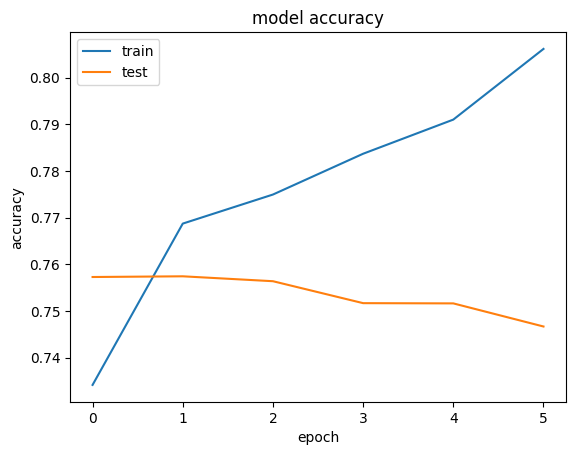

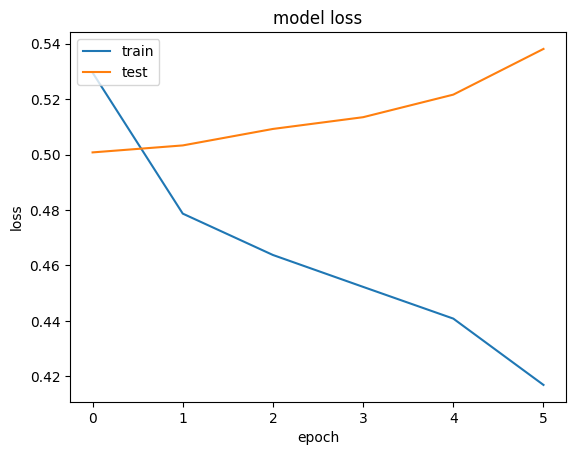

In [95]:
plot_history(history)

## Long Short Term Memory (LSTM)

In [96]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [97]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 10, 32)            160000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 10, 32)            0         
 alDropout1D)                                                    
                                                                 
 lstm_8 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 242561 (947.50 KB)
Trainable params: 242561 (947.50 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [98]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

Epoch 1/30

Epoch 1: val_loss did not improve from 0.49525
2500/2500 - 21s - loss: 0.5270 - accuracy: 0.7346 - val_loss: 0.4991 - val_accuracy: 0.7592 - lr: 0.0010 - 21s/epoch - 8ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 0.49525
2500/2500 - 12s - loss: 0.4783 - accuracy: 0.7704 - val_loss: 0.4996 - val_accuracy: 0.7549 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.49525
2500/2500 - 12s - loss: 0.4569 - accuracy: 0.7818 - val_loss: 0.4970 - val_accuracy: 0.7594 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.49525
2500/2500 - 12s - loss: 0.4380 - accuracy: 0.7928 - val_loss: 0.5052 - val_accuracy: 0.7559 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 0.49525
2500/2500 - 13s - loss: 0.4218 - accuracy: 0.8009 - val_loss: 0.5182 - val_accuracy: 0.7515 - lr: 0.0010 - 13s/epoch - 5ms/step
Epoch 6/30

Epoch 6: ReduceLROnPlateau reducing learning rate to 

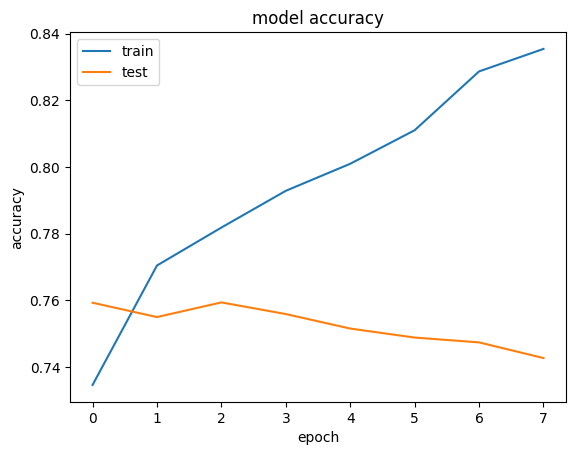

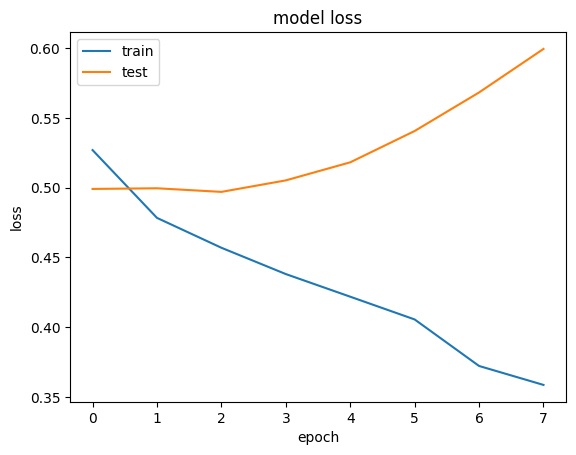

In [99]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(X_train,
                     y_train,
                     epochs=num_epochs,
                     validation_data=(X_test, y_test),
                     callbacks =[learning_rate_reduction, early_stopping, mcp_save],
                     verbose=2)
plot_history(history)

## Bidirectional Long Short Term Memory (Bi-LSTM)

In [100]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(n_lstm,
                              return_sequences = False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(1, activation='sigmoid'))

In [101]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 32)            160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               164864    
 onal)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 325121 (1.24 MB)
Trainable params: 325121 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

Epoch 1/30

Epoch 1: val_loss did not improve from 0.49525
2500/2500 - 28s - loss: 0.5250 - accuracy: 0.7364 - val_loss: 0.4983 - val_accuracy: 0.7577 - lr: 0.0010 - 28s/epoch - 11ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.49525 to 0.49475, saving model to .mdl_wts.hdf5
2500/2500 - 17s - loss: 0.4788 - accuracy: 0.7706 - val_loss: 0.4947 - val_accuracy: 0.7594 - lr: 0.0010 - 17s/epoch - 7ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.49475
2500/2500 - 16s - loss: 0.4523 - accuracy: 0.7844 - val_loss: 0.4997 - val_accuracy: 0.7579 - lr: 0.0010 - 16s/epoch - 6ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.49475
2500/2500 - 16s - loss: 0.4247 - accuracy: 0.7985 - val_loss: 0.5142 - val_accuracy: 0.7509 - lr: 0.0010 - 16s/epoch - 7ms/step
Epoch 5/30

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_loss did not improve from 0.49475
2500/2500 - 15s - loss: 0.3990 - accuracy: 0.8139 - val_loss: 0.5425 - val_accur

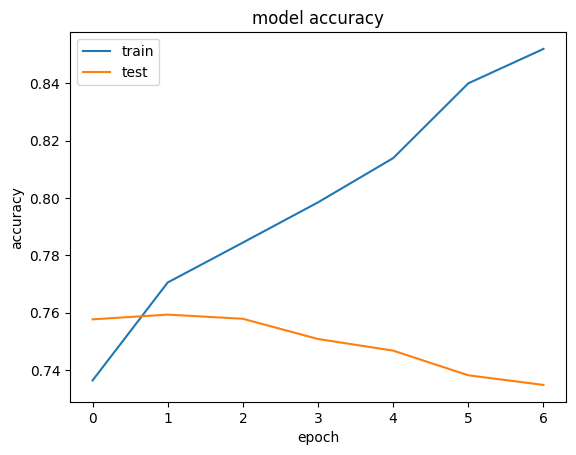

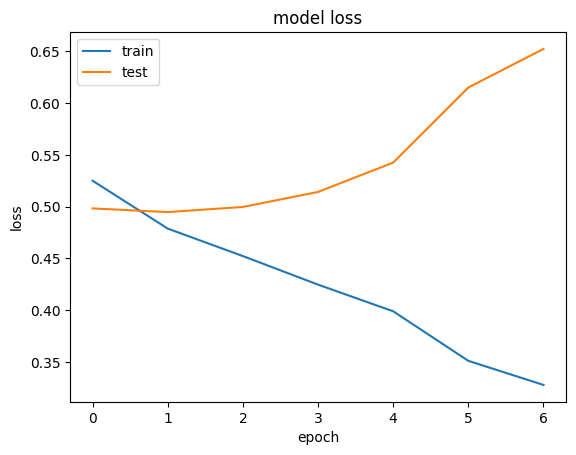

In [103]:
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
history = model2.fit(X_train,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (X_test, y_test),
                     callbacks = [learning_rate_reduction, early_stopping, mcp_save],
                     verbose = 2)
plot_history(history)

## Gated Recurrent Unit (GRU)

In [104]:
model3 = Sequential()
model3.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model3.add(SpatialDropout1D(0.2))
model3.add(GRU(128, return_sequences = False))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation = 'sigmoid'))

In [105]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 32)            160000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 10, 32)            0         
 alDropout1D)                                                    
                                                                 
 gru_5 (GRU)                 (None, 128)               62208     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 222337 (868.50 KB)
Trainable params: 222337 (868.50 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [106]:
model3.compile(loss = 'binary_crossentropy',
                       optimizer = 'adam',
                       metrics=['accuracy'])

Epoch 1/30

Epoch 1: val_loss did not improve from 0.49475
2500/2500 - 22s - loss: 0.5262 - accuracy: 0.7370 - val_loss: 0.4971 - val_accuracy: 0.7545 - lr: 0.0010 - 22s/epoch - 9ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 0.49475
2500/2500 - 12s - loss: 0.4752 - accuracy: 0.7738 - val_loss: 0.4997 - val_accuracy: 0.7583 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.49475
2500/2500 - 12s - loss: 0.4527 - accuracy: 0.7855 - val_loss: 0.5060 - val_accuracy: 0.7552 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 0.49475
2500/2500 - 12s - loss: 0.4379 - accuracy: 0.7956 - val_loss: 0.5139 - val_accuracy: 0.7543 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 5/30

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_loss did not improve from 0.49475
2500/2500 - 11s - loss: 0.4210 - accuracy: 0.8040 - val_loss: 0.5250 - val_accuracy: 0.7478 - lr: 0.0010 - 11s/epoch

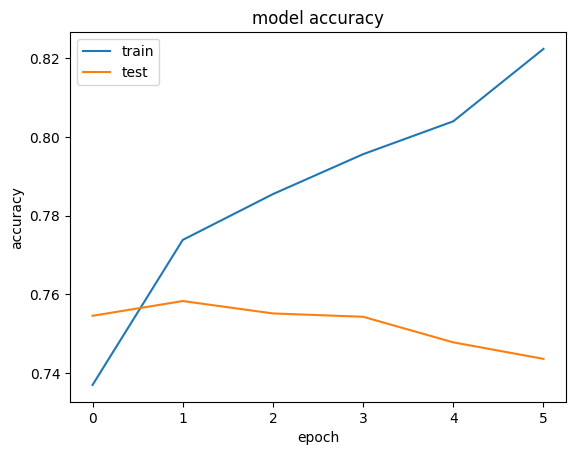

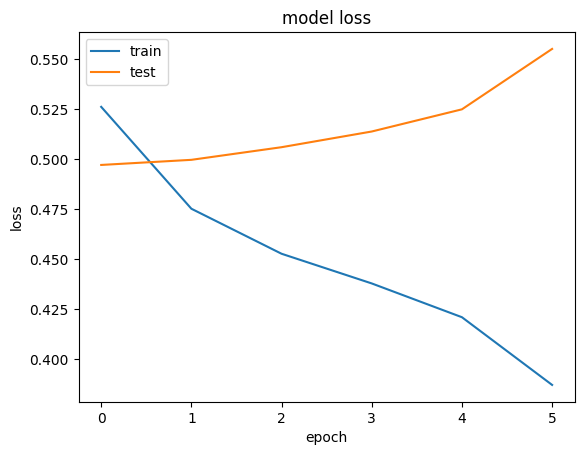

In [107]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model3.fit(X_train,
                     y_train,
                     epochs=num_epochs,
                     validation_data=(X_test, y_test),
                     callbacks =[learning_rate_reduction, early_stopping, mcp_save],
                     verbose=2)
plot_history(history)

## LSTM model

In [83]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.Embedding(5000, 32, input_length=10))
lstm_model.add(keras.layers.LSTM(100, return_sequences = True))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.LSTM(100, return_sequences = False))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.Dense(1, activation="sigmoid"))
lstm_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

Epoch 1/30
2500/2500 [==============================] - ETA: 0s - loss: 0.5449 - accuracy: 0.7222
Epoch 1: val_loss did not improve from 0.49552
2500/2500 [==============================] - 27s 10ms/step - loss: 0.5449 - accuracy: 0.7222 - val_loss: 0.5087 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 2/30
2493/2500 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.7592
Epoch 2: val_loss did not improve from 0.49552
2500/2500 [==============================] - 18s 7ms/step - loss: 0.5004 - accuracy: 0.7593 - val_loss: 0.5043 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 3/30
2492/2500 [============================>.] - ETA: 0s - loss: 0.4892 - accuracy: 0.7662
Epoch 3: val_loss did not improve from 0.49552
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4891 - accuracy: 0.7663 - val_loss: 0.5040 - val_accuracy: 0.7551 - lr: 0.0010
Epoch 4/30
2500/2500 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.7718
Epoch 4: val_loss did not

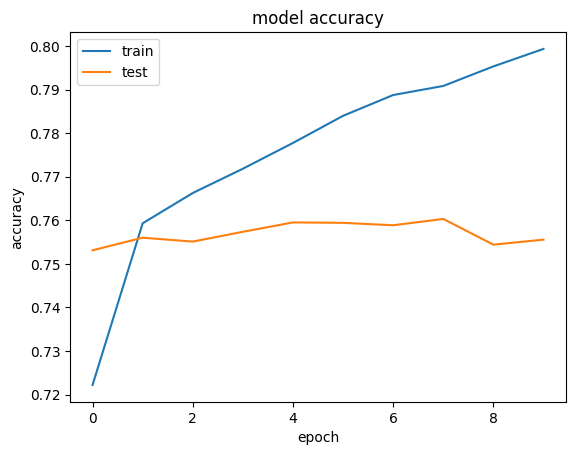

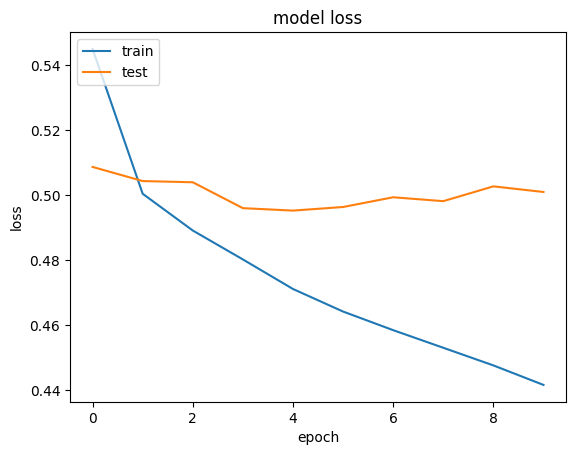

In [84]:
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_test, y_test), callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

## Gated Recurrent Unit (GRU)

In [85]:
gru_model = keras.Sequential()
gru_model.add(keras.layers.Embedding(5000, 32, input_length=10))
gru_model.add(keras.layers.GRU(100, return_sequences = True, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.GRU(100, return_sequences = False, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.Dense(1, activation="sigmoid"))
gru_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

Epoch 1/10
2496/2500 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7265
Epoch 1: val_loss did not improve from 0.49525
2500/2500 [==============================] - 25s 9ms/step - loss: 0.5408 - accuracy: 0.7265 - val_loss: 0.5084 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 2/10
2493/2500 [============================>.] - ETA: 0s - loss: 0.4996 - accuracy: 0.7606
Epoch 2: val_loss did not improve from 0.49525
2500/2500 [==============================] - 18s 7ms/step - loss: 0.4996 - accuracy: 0.7606 - val_loss: 0.4990 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 3/10
2496/2500 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.7699
Epoch 3: val_loss did not improve from 0.49525
2500/2500 [==============================] - 17s 7ms/step - loss: 0.4846 - accuracy: 0.7698 - val_loss: 0.4976 - val_accuracy: 0.7588 - lr: 0.0010
Epoch 4/10
2494/2500 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.7763
Epoch 4: val_loss did not 

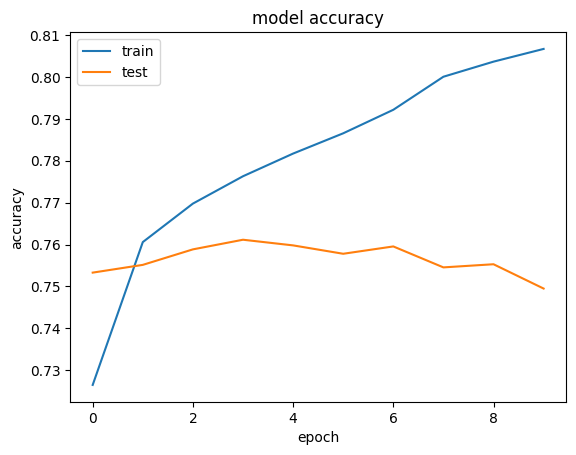

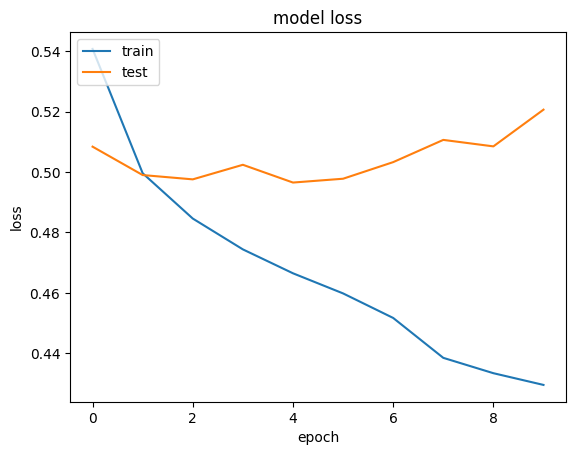

In [86]:
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

## I have tried many algorithms model to achieve best also tuned the model get best accuracy, accuracy as per below,
LSTM model:- train : 76% and test : 75%

Gated Recurrent Unit (GRU):- train : 80% and test : 75%

Dense Model:- train : 80% and test : 74%

LSTM model:- train : 83% and test : 74%

Bidirectional Long Short Term Memory (Bi-LSTM):- train : 85% and test : 73%

Gated Recurrent Unit (GRU):- train : 82% and test : 74%

LSTM model:- train : 79% and test : 75%

Gated Recurrent Unit (GRU):- train : 80% and test : 74%

#### Because of on huge data system get crashed, i have been used few data also lower number of epoch to process the model 